Import Section


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sys
sys.path.append('..')

Preprocess

In [2]:
from src.data_preprocessing import load_and_clean_data

X_train, X_test, y_train, y_test = load_and_clean_data(path="..\\data\\loan.csv")

f:\10_study\loan_approval_predictor\notebooks\..\src\data_preprocessing.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
f:\10_study\loan_approval_predictor\notebooks\..\src\data_preprocessing.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    })


f:\10_study\loan_approval_predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\10_study\loan_approval_predictor\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:31:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


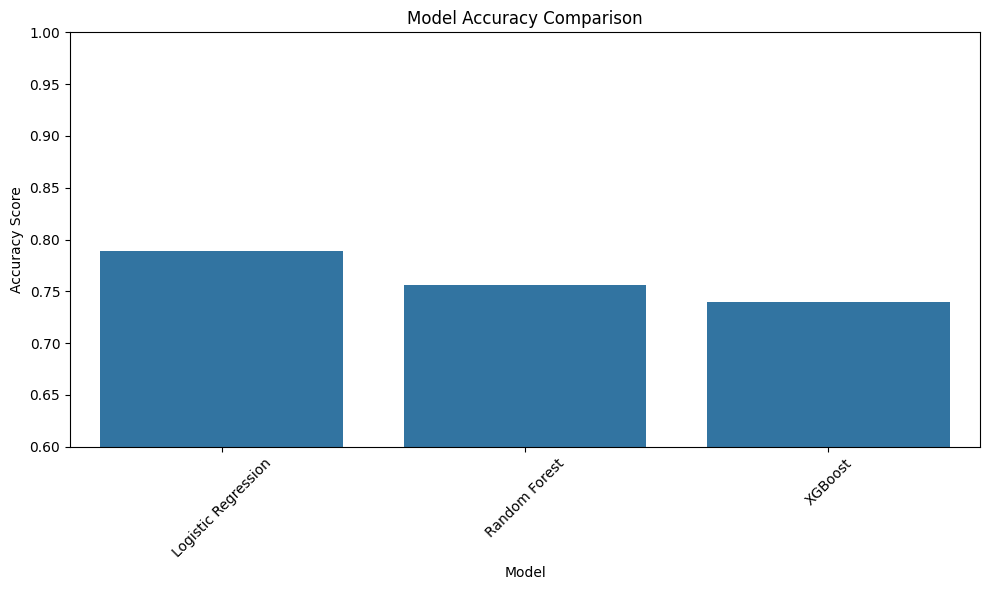

In [5]:
results_df = pd.DataFrame(results)

# Plot accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0.6, 1.0)
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
results_df["Classification Report"][0]

{'0': {'precision': 0.9473684210526315,
  'recall': 0.4186046511627907,
  'f1-score': 0.5806451612903226,
  'support': 43.0},
 '1': {'precision': 0.7596153846153846,
  'recall': 0.9875,
  'f1-score': 0.8586956521739131,
  'support': 80.0},
 'accuracy': 0.7886178861788617,
 'macro avg': {'precision': 0.853491902834008,
  'recall': 0.7030523255813954,
  'f1-score': 0.7196704067321178,
  'support': 123.0},
 'weighted avg': {'precision': 0.8252526249958856,
  'recall': 0.7886178861788617,
  'f1-score': 0.7614910090194872,
  'support': 123.0}}

In [12]:
import joblib
best_model = models["Logistic Regression"]
joblib.dump(best_model, "..\\model.joblib")
joblib.dump((X_test, y_test), "..\\test_data.joblib")


['..\\test_data.joblib']